Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Loading the DataFrame

In [ ]:
google_dataset_path = '/content/GOOG.csv'
df = pd.read_csv(google_dataset_path)

In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


Data Preprocessing

In [ ]:
df = df[['date', 'close', 'volume', 'open', 'high', 'low']]
df.head()

,date,close,volume,open,high,low
0,2016-06-14 00:00:00+00:00,718.27,1306065,716.48,722.47,713.1200
1,2016-06-15 00:00:00+00:00,718.92,1214517,719.00,722.98,717.3100
2,2016-06-16 00:00:00+00:00,710.36,1982471,714.91,716.65,703.2600
3,2016-06-17 00:00:00+00:00,691.72,3402357,708.65,708.82,688.4515
4,2016-06-20 00:00:00+00:00,693.71,2082538,698.77,702.48,693.4100


In [ ]:
# changing the dtype of data column from object to datetime
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

<ipython-input-203-2397ed4cef5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)


,close,volume,open,high,low
date,,,,,
2016-06-14 00:00:00+00:00,718.27,1306065,716.48,722.47,713.1200
2016-06-15 00:00:00+00:00,718.92,1214517,719.00,722.98,717.3100
2016-06-16 00:00:00+00:00,710.36,1982471,714.91,716.65,703.2600
2016-06-17 00:00:00+00:00,691.72,3402357,708.65,708.82,688.4515
2016-06-20 00:00:00+00:00,693.71,2082538,698.77,702.48,693.4100


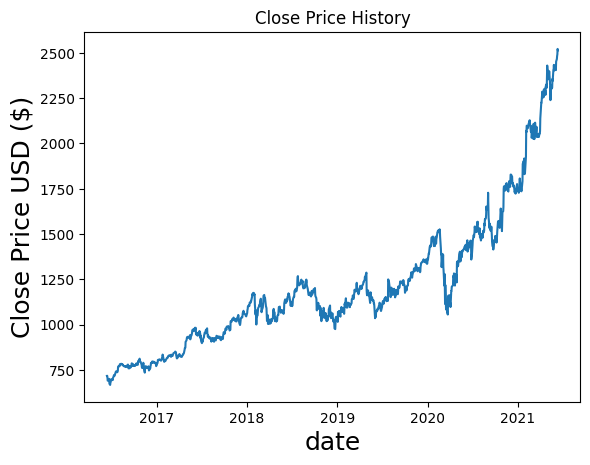

In [ ]:
# plotting the variation of Close Price with date
plt.figure()
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# removing rows with null/NaN entries
df = df.dropna()
df

,close,volume,open,high,low
date,,,,,
2016-06-14 00:00:00+00:00,718.27,1306065,716.48,722.470,713.1200
2016-06-15 00:00:00+00:00,718.92,1214517,719.00,722.980,717.3100
2016-06-16 00:00:00+00:00,710.36,1982471,714.91,716.650,703.2600
2016-06-17 00:00:00+00:00,691.72,3402357,708.65,708.820,688.4515
2016-06-20 00:00:00+00:00,693.71,2082538,698.77,702.480,693.4100
...,...,...,...,...,...
2021-06-07 00:00:00+00:00,2466.09,1192453,2451.32,2468.000,2441.0725
2021-06-08 00:00:00+00:00,2482.85,1253253,2479.90,2494.495,2468.2400
2021-06-09 00:00:00+00:00,2491.40,1006337,2499.50,2505.000,2487.3300


In [ ]:
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

1007

In [ ]:
# Scaling the dataset to numbers between 0 and 1 for better predictions
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
# number of features: 60 (closing price of 60 previous days)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598,
       0.03966353, 0.04189733, 0.05424261, 0.05644944, 0.05547282,
       0.05661131, 0.05576419, 0.06148899, 0.06124079, 0.0625897 ,
       0.06281632, 0.06290805, 0.06202855, 0.06160769, 0.05874799,
       0.06024259, 0.05894223, 0.05781994, 0.05605555, 0.05601778,
       0.05470124, 0.05457714, 0.05464729, 0.05605555, 0.05440448,
       0.05330377, 0.05423721, 0.05568325, 0.06033432, 0.06048   ])]
[0.05776597925906746]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01

The LSTM Model:

In [ ]:
# defining a huber_loss function that uses sqaured error loss for errors less than delta
# while it uses absolute error loss for errors greated than delta
# I later realized that since the stocks can have large changes, using huber_loss
# might not be a great idea since it won't penalize large erros as good as
# mse does
def huber_loss(y_true, y_pred, delta=1.0):
  squared_loss = tf.square(y_true - y_pred)
  linear_loss = tf.abs(y_true - y_pred) - delta
  return tf.where(y_pred < y_true + delta, squared_loss, delta * linear_loss)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

947/947 [==============================] - 67s 64ms/step - loss: 7.5800e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 38ms/step


53.048987506563726

Plotting the Final Data

<ipython-input-206-1858bc22fdca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


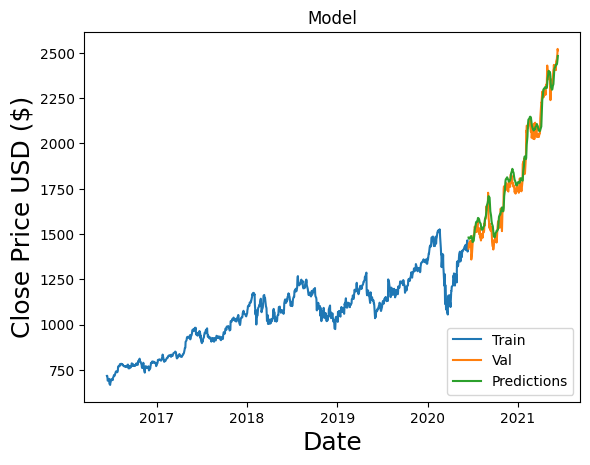

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure()
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()